# **Step 0: Imports and Reading Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [2]:
df = pd.read_csv('/kaggle/input/rollercoaster-database/coaster_db.csv')

# **Step 1: Data Understanding**

* Dataframe shape
* head and tail
* dtypes
* describe 


In [3]:
df.shape

(1087, 56)

In [4]:
df.head(1)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.574,-73.978,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9


In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [7]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# **Step 2: Data Preperation**
* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [8]:
df = df[['coaster_name', #'Length', 'Speed', 
    'Location', 'Status',# 'Opening date',
       #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #   'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #   'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #   'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #   'Track layout', 'Fastrack available', 'Soft opening date.1',
    #   'Closing date', 'Opened', 
    #   'Replaced by', 'Website',
    #   'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #   'Single rider line available', 'Restraint Style',
    #   'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #   'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [9]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
#pd.to_numerical(['column you want to convert to numeric values'])

In [10]:
# Rename our columns
df = df.rename(columns={'coaster_name': 'Coaster_Name',
                  'year_introduced' : 'Year_Introduced',
                   'latitude': "Latitude", 
                   'longitude' : 'Longitude', 
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_Mph',
                   'height_ft' : 'Height_Ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'
                  })

In [11]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_Mph          150
Height_Ft          916
Inversions           0
Gforce             725
dtype: int64

In [12]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce


In [19]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [21]:
#Checking a example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [22]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date', 'Speed_Mph',
       'Height_Ft', 'Inversions', 'Gforce'],
      dtype='object')

In [23]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop = True).copy()

In [24]:
df.shape

(990, 13)

# **Step 3: Feature Understandning** 

(Univariate analysis)
* Plotting Feature Distributions
    * Histogram
    * KDE
    * Boxplot

In [29]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

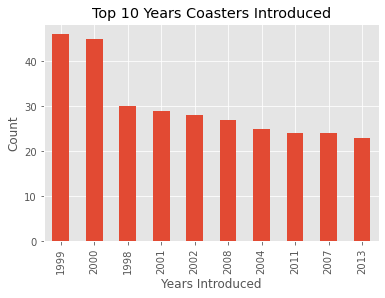

In [34]:
ax = df['Year_Introduced'].value_counts()\
.head(10) \
.plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Years Introduced')
ax.set_ylabel('Count')

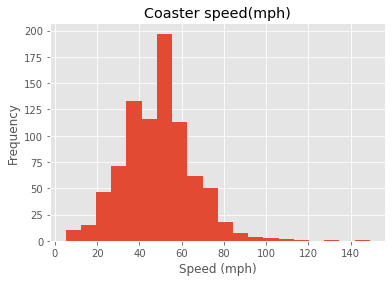

In [82]:
ax = df['Speed_Mph'].plot(kind='hist',
                     bins=20, 
                     title='Coaster speed(mph)')
ax.set_xlabel('Speed (mph)')
plt.show()

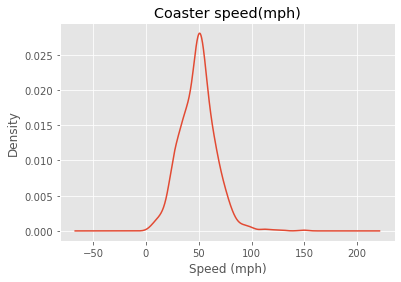

In [80]:
ax = df['Speed_Mph'].plot(kind='kde',
                          title='Coaster speed(mph)')
ax.set_xlabel('Speed (mph)')
plt.show()

# **Step 4: Feature Relationships**

* Scatterplot
* Headmap Correlation
* Pairplot
* Groupby comperasions

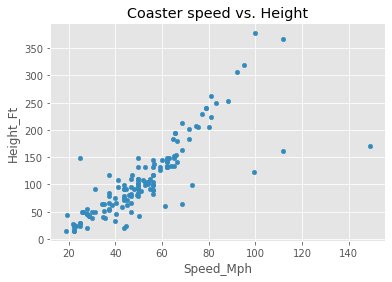

In [46]:
df.plot(kind='scatter', 
        x='Speed_Mph',
        y='Height_Ft',
        title = 'Coaster speed vs. Height')
plt.show()

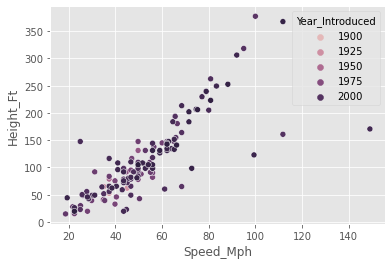

In [51]:
sns.scatterplot(x='Speed_Mph',
                y='Height_Ft',
                hue ='Year_Introduced',
                data = df)
plt.show()

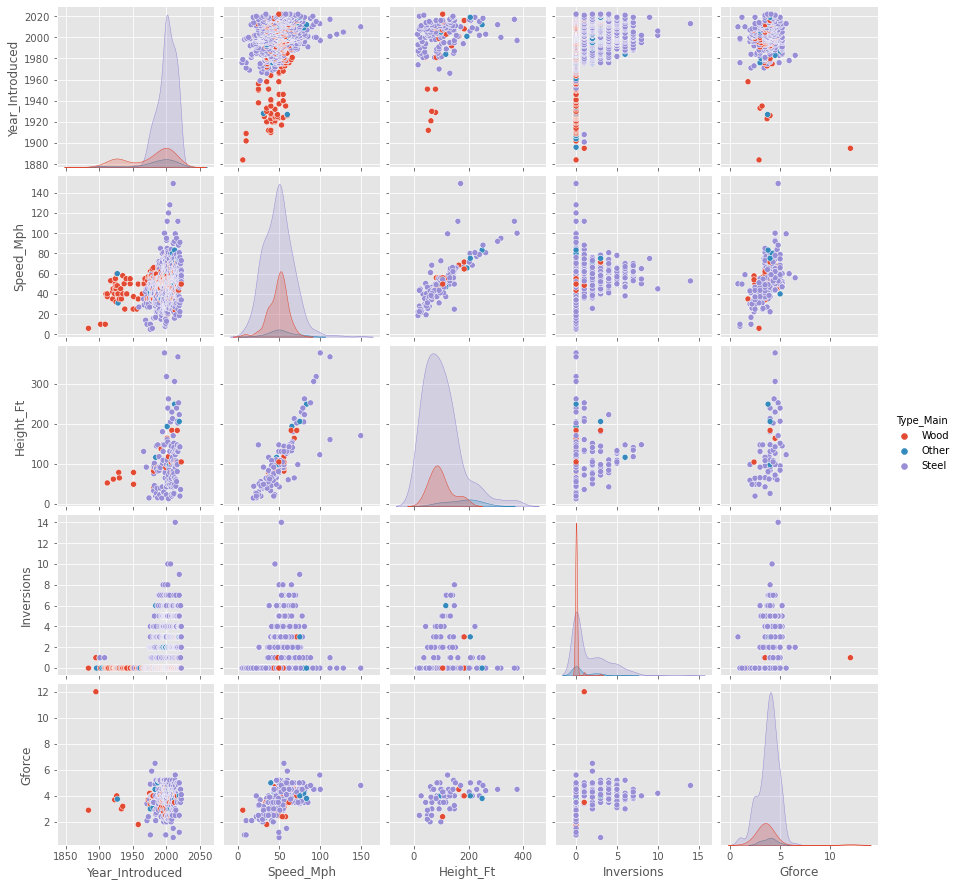

In [54]:
sns.pairplot(df, 
             vars=['Year_Introduced', 'Speed_Mph', 
                       'Height_Ft', 'Inversions', 'Gforce'],
                    hue='Type_Main')
plt.show()

In [59]:
df_corr = df[['Year_Introduced', 'Speed_Mph', 
    'Height_Ft', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_Mph,Height_Ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_Mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_Ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<AxesSubplot:>

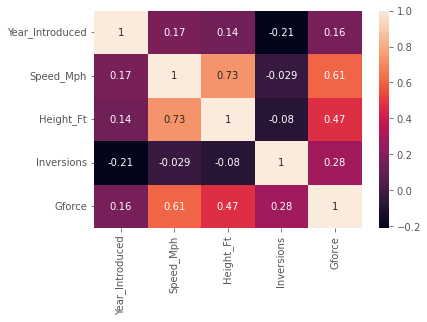

In [60]:
sns.heatmap(df_corr, annot=True)

# **Step 5: Ask a Question about the data**
* Try to answer a question you have about the data using a plot or statistic

What are the locations with the fastest roller coasters? (minimum of 10 coaster at the location)

In [61]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [62]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

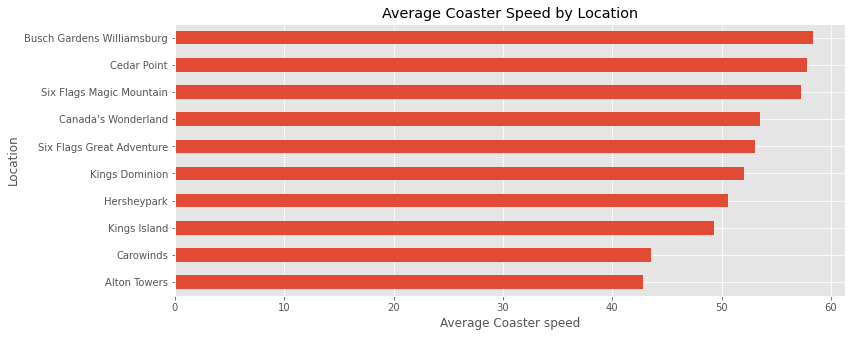

In [83]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12,5),title='Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster speed')
plt.show()